In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import nltk
import re
import string
import seaborn as sns

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/kro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataStack = pd.read_csv("../QueryResults.csv")
dataStack["CreationDate"] = pd.to_datetime(dataStack["CreationDate"],format='%Y-%m-%d %H:%M:%S')
dataStack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23617 entries, 0 to 23616
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     23617 non-null  int64         
 1   PostTypeId             23617 non-null  int64         
 2   AcceptedAnswerId       20773 non-null  float64       
 3   ParentId               0 non-null      float64       
 4   CreationDate           23617 non-null  datetime64[ns]
 5   DeletionDate           0 non-null      float64       
 6   Score                  23617 non-null  int64         
 7   ViewCount              23617 non-null  int64         
 8   Body                   23617 non-null  object        
 9   OwnerUserId            23043 non-null  float64       
 10  OwnerDisplayName       3989 non-null   object        
 11  LastEditorUserId       21437 non-null  float64       
 12  LastEditorDisplayName  2749 non-null   object        
 13  L

In [4]:
dataStack.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,7284,1,7320.0,NaN,2008-08-10 18:41:02,NaN,559,207501,"<p>What does the expression ""Turing Complete"" ...",198.0,...,2012-06-23 00:22:15,2021-04-10 17:47:05,What is Turing Complete?,<theory><turing-machines><turing-complete>,15,1,182,NaN,NaN,CC BY-SA 3.0
1,7477,1,7523.0,NaN,2008-08-11 01:43:13,NaN,123,145744,<p>I'm currently working on an internal sales ...,841.0,...,2019-01-03 06:54:14,2020-03-09 14:10:06,How to autosize a textarea using Prototype?,<javascript><html><css><textarea><prototypejs>,18,4,67,NaN,NaN,CC BY-SA 4.0
2,7492,1,NaN,NaN,2008-08-11 03:00:26,NaN,246,160754,"<p>In the past, I used Microsoft Web Applicati...",556.0,...,2017-10-25 14:52:17,2018-08-30 15:01:26,Performing a Stress Test on Web Application?,<web-applications><stress-testing><performance...,30,0,174,NaN,NaN,CC BY-SA 3.0
3,17732,1,NaN,NaN,2008-08-20 11:01:19,NaN,175,59340,"<p>There's a <a href=""http://groups.google.com...",2095.0,...,2017-05-23 11:47:25,2020-10-16 17:24:22,When should assertions stay in production code?,<assert>,17,1,60,2020-03-24 06:04:04,2010-06-10 14:39:45,CC BY-SA 2.5
4,17806,1,2137718.0,NaN,2008-08-20 12:00:59,NaN,340,194826,<p>I am currently developing a .NET applicatio...,2078.0,...,2021-05-26 18:59:42,2021-05-26 18:59:42,Warning: Found conflicts between different ver...,<.net><warnings>,19,0,64,NaN,NaN,CC BY-SA 4.0


In [5]:
def nettoyageGe(listToClean):
    # Lower case
    locList = listToClean.str.lower()
    #Delete some ponctuation
    ponct = "?,:\/@"
    print(locList)
    locList = locList.apply(lambda x : ''.join([i for i in x if not i in ponct]))
    
    #Delete digit
    #Delete number
    #locList = locList.apply(lambda x : re.sub('<[^<]+?>', '', x))
    locList = locList.apply(lambda x : ''.join([i for i in x if not i.isdigit()]))
    locList = locList.str.replace("\n"," ")
    print(locList)
    locList = locList.str.replace("i'm","i am")
    locList = locList.str.replace("i've","i have")
    locList = locList.str.replace("i'd","i would")
    locList = locList.str.replace("don't","do not")

    
    return(locList)

In [6]:
dataStack['MainTags']=dataStack['Tags'].str.replace("<","")
dataStack['MainTags']=dataStack['MainTags'].str.replace(">",",")
dataStack['MainTags']=dataStack['MainTags'].str[:-1]

In [7]:
dataStack['CreationDate'].dt.year.value_counts()

2009    4534
2010    4069
2011    3694
2012    2904
2008    2682
2013    2402
2014    1388
2015     859
2016     591
2017     325
2018     119
2019      43
2020       7
Name: CreationDate, dtype: int64

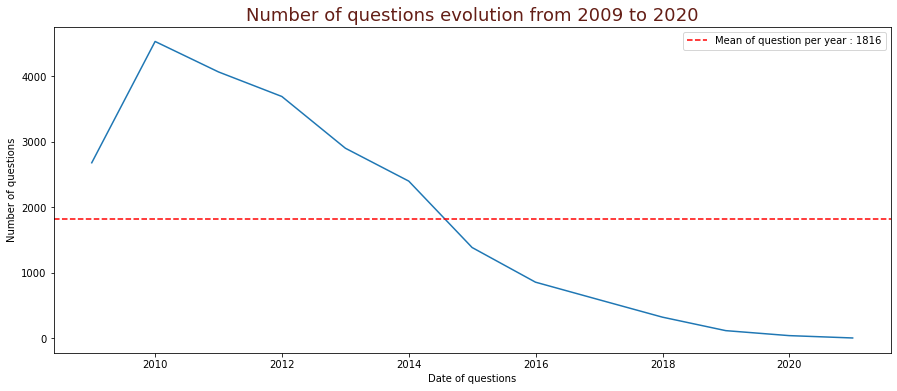

In [8]:
# Convert
dataStack['CreationDate'] = pd.to_datetime(dataStack['CreationDate'])

# Groupby
post_year = dataStack.groupby(pd.Grouper(key='CreationDate',
                                    freq='1Y')).agg({'Title': 'count'})

# Evolution
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=post_year, x=post_year.index, y='Title')
plt.axhline(post_year.Title.mean(), 
            color="r", linestyle='--',
            label="Mean of question per year : {:04d}"\
                   .format(int(post_year.Title.mean())))
plt.xlabel("Date of questions")
plt.ylabel("Number of questions")
plt.title("Number of questions evolution from 2009 to 2020",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

# Tags

In [9]:
#function Tags list
def getListTag(listToWork,sep,years="All"):
    tagList=[]
    tempData = dataStack[dataStack['Tags'].notnull()].copy()
    
    if years != "All":
        tempData = tempData[tempData['CreationDate'].dt.year==years]
    for tags in tempData[listToWork]:
        for mot in tags.split(sep):
            tagList.append(mot)
    tagList = pd.DataFrame(tagList).value_counts()
    tagList = pd.DataFrame(tagList)
    
    tagList.rename(columns={0: 'Nbr'},inplace=True)
    tagList = tagList.reset_index()
    return tagList

In [10]:
listTags = getListTag('MainTags',',')
print(listTags)
listTags = listTags.iloc[:30]

                     0   Nbr
0           javascript  2545
1               python  2507
2                 java  2012
3              android  1627
4                  git  1263
...                ...   ...
7648     php-internals     1
7649              php4     1
7650            phpdoc     1
7651  face-recognition     1
7652      lateral-join     1

[7653 rows x 2 columns]


<Figure size 1080x720 with 0 Axes>

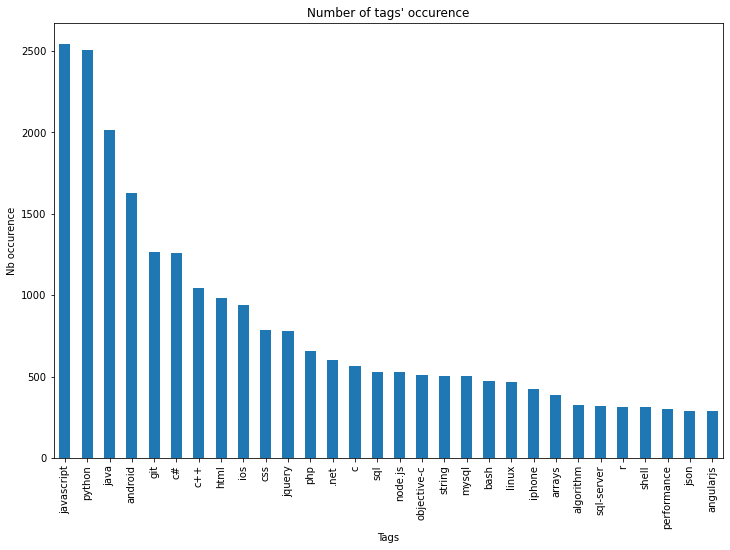

In [11]:
# Plot results of tags
fig = plt.figure(figsize=(15, 10))

listTags.plot(figsize=(12,8), kind="bar",
          title="Number of tags' occurence",
          ylabel="Nb occurence",
          xlabel="Tags",
          legend=False)
plt.xticks(np.arange(len(listTags)),listTags[0])
plt.show()

In [12]:
def keep_info(listInfo,toKeep):
    """Return the list of information which is in the 'keep list'"""
    loc = []
    try:
        listInfo=str(listInfo)
        if listInfo != 'nan':
            for word in listInfo.split(','):
                if word in toKeep[0].values:
                    loc.append(word)
    except:
        print("Except ",listInfo)
    return loc

def remove_info(listInfo,toKeep):
    """Return the list of information which isnot in the 'keep list'"""
    loc = []
    try:
        listInfo=str(listInfo)
        if listInfo != 'nan':
            for word in listInfo.split(' '):
                if word not in toKeep:
                    loc.append(word)
    except:
        print("Except ",listInfo)
    return loc

In [13]:
# keep top 50 tags
dataStack['MainTags']=dataStack['MainTags'].apply(lambda x : keep_info(x,listTags))

In [14]:
tempTag = dataStack[dataStack['Tags'].notnull()].copy()
tempTag['NbrTag'] = tempTag['Tags'].apply(lambda x : len(x))

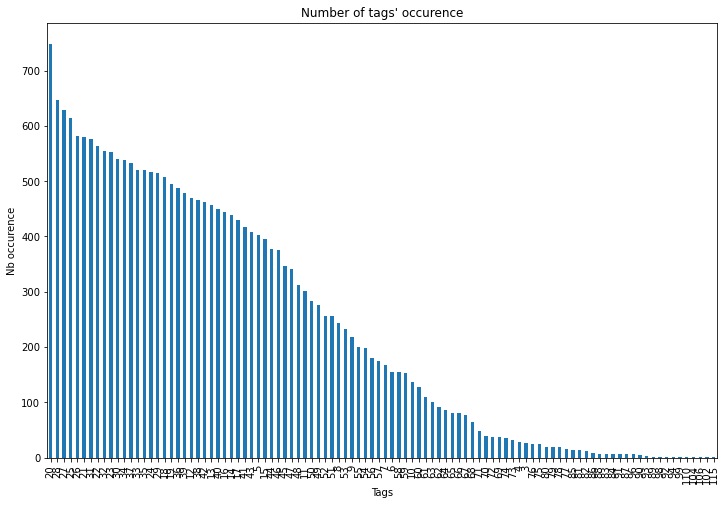

In [15]:
# Plot results of tags
fig = plt.figure(figsize=(15, 10))

tempTag['NbrTag'].value_counts().plot(figsize=(12,8), kind="bar",
          title="Number of tags' occurence",
          ylabel="Nb occurence",
          xlabel="Tags",
          legend=False)
plt.show()

# Title

In [16]:
# Tokenization
#Seperate c# avec nltk.word_tokenize
dataStack['MainWordTitle'] = nettoyageGe(dataStack['Title'])

0                                 what is turing complete?
1              how to autosize a textarea using prototype?
2             performing a stress test on web application?
3          when should assertions stay in production code?
4        warning: found conflicts between different ver...
                               ...                        
23612               how do i run a single test using jest?
23613    convert:not authorized `aaaa` @ error/constitu...
23614    how to transform black into any given color us...
23615    intuitive understanding of 1d, 2d, and 3d conv...
23616    what is the difference between .net core and ....
Name: Title, Length: 23617, dtype: object
0                                  what is turing complete
1               how to autosize a textarea using prototype
2              performing a stress test on web application
3           when should assertions stay in production code
4        warning found conflicts between different vers...
              

In [17]:
listTitle = getListTag('MainWordTitle', ' ')

<Figure size 1080x720 with 0 Axes>

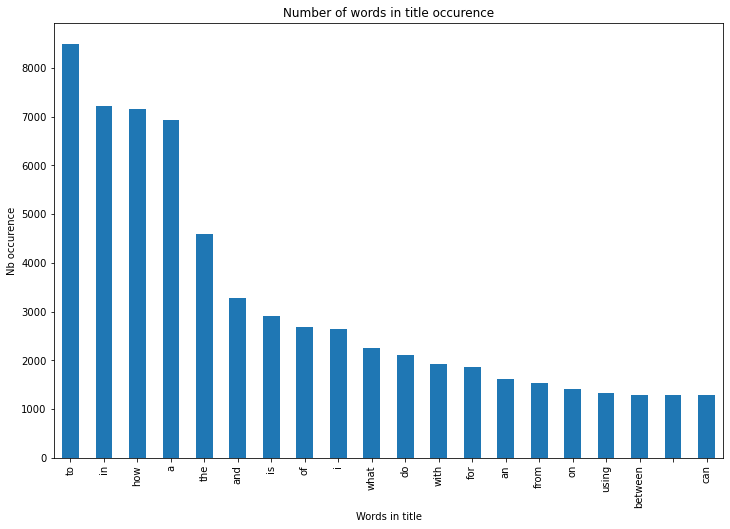

In [18]:
# Plot results of tags
fig = plt.figure(figsize=(15, 10))

listTitle.iloc[:20].plot(figsize=(12,8), kind="bar",
          title="Number of words in title occurence",
          ylabel="Nb occurence",
          xlabel="Words in title",
          legend=False)
plt.xticks(np.arange(20),listTitle.iloc[:20][0])
plt.show()

In [19]:
stopWords = listTitle.iloc[:20][0]

In [20]:
#StopWords

sw = set()
sw.update(stopWords)
sw.update(tuple(nltk.corpus.stopwords.words('english')))
#print(sw)
#tempTag['MainWordTitle'] = tempTag['MainWordTitle']
# remove stopword
dataStack['MainWordTitle'] = dataStack['MainWordTitle'].apply(lambda x : str(remove_info(x,sw)))
print(dataStack['MainWordTitle'].head())

0                               ['turing', 'complete']
1                ['autosize', 'textarea', 'prototype']
2    ['performing', 'stress', 'test', 'web', 'appli...
3         ['assertions', 'stay', 'production', 'code']
4    ['warning', 'found', 'conflicts', 'different',...
Name: MainWordTitle, dtype: object


# Body

In [21]:
dataStack['MainWordBody'] = nettoyageGe(dataStack['Body'])
# Delete htlm tags
dataStack['MainWordBody'] = dataStack['MainWordBody'].apply(lambda x : re.sub('<[^<]+?>', '', x))


0        <p>what does the expression "turing complete" ...
1        <p>i'm currently working on an internal sales ...
2        <p>in the past, i used microsoft web applicati...
3        <p>there's a <a href="http://groups.google.com...
4        <p>i am currently developing a .net applicatio...
                               ...                        
23612    <p>i have a test 'works with nested children' ...
23613    <p>i want to create a captcha pic by use <code...
23614    <p>my question is: given a target rgb color, w...
23615    <p>can anyone please clearly explain the diffe...
23616    <p>in visual studio, there are at least three ...
Name: Body, Length: 23617, dtype: object
0        <p>what does the expression "turing complete" ...
1        <p>i'm currently working on an internal sales ...
2        <p>in the past i used microsoft web applicatio...
3        <p>there's a <a href="httpgroups.google.comgro...
4        <p>i am currently developing a .net applicatio...
               

In [22]:
listBody = getListTag('MainWordBody', ' ')
print(listBody)
listBody = listBody.iloc[:110]

                   0     Nbr
0                     817525
1                the  103648
2                  i   85148
3                 to   74885
4                  a   57067
...              ...     ...
169028          get(       1
169029  'scientific'       1
169030  get$.get(..)       1
169031         get".       1
169032            😀]       1

[169033 rows x 2 columns]


<Figure size 1440x720 with 0 Axes>

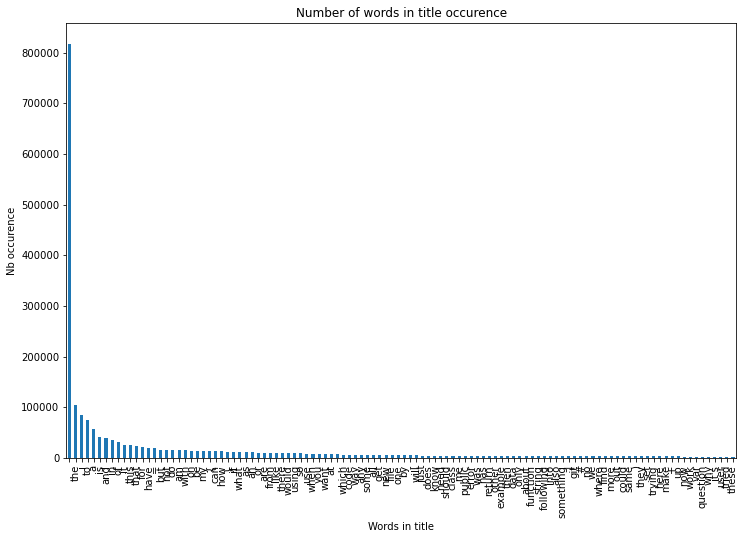

In [23]:
# Plot results of tags
fig = plt.figure(figsize=(20, 10))

listBody.plot(figsize=(12,8), kind="bar",
          title="Number of words in title occurence",
          ylabel="Nb occurence",
          xlabel="Words in title",
          legend=False)
plt.xticks(np.arange(len(listBody)),listBody[0])
plt.show()

In [24]:
stopWords = listBody.iloc[:20][0]

In [25]:
#StopWords
sw = set()
sw.update(stopWords)
sw.update(tuple(nltk.corpus.stopwords.words('english')))

# remove stopword
dataStack['MainWordBody'] = dataStack['MainWordBody'].apply(lambda x : remove_info(x,sw))
print(dataStack['MainWordBody'].head())

0    [expression, "turing, complete", mean, give, s...
1    [currently, working, internal, sales, applicat...
2    [past, used, microsoft, web, application, stre...
3    [there's, discussion, going, comp.lang.c++.mod...
4    [currently, developing, .net, application, con...
Name: MainWordBody, dtype: object


# Data saved

In [26]:
dataStack[['Id','MainTags','MainWordBody','MainWordTitle']].to_csv("../QueryResults_Clear.csv",index=False)